In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action='ignore')

# ANALYSING DATA

In [189]:
data=pd.read_csv('churn_prediction.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   days_since_last_transaction     25159 non-null  float64
 10  current_balance                 28382 non-null  float64
 11  previous_month_end_balance      28382 non-null  float64
 12  average_monthly_balance_prevQ   

In [191]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

# DATA PREPROCESSING

## Treating Missing Value

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   days_since_last_transaction     25159 non-null  float64
 10  current_balance                 28382 non-null  float64
 11  previous_month_end_balance      28382 non-null  float64
 12  average_monthly_balance_prevQ   

In [193]:
from sklearn.impute import SimpleImputer

In [194]:
data['gender'].shape,data['dependents'].shape,data['occupation'].shape,data['city'].shape,data['days_since_last_transaction'].shape

((28382,), (28382,), (28382,), (28382,), (28382,))

In [195]:
data['gender'].value_counts()

gender
Male      16548
Female    11309
Name: count, dtype: int64

In [196]:
data['gender'].fillna('Male',inplace=True)

In [197]:
data['occupation'].value_counts()

occupation
self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: count, dtype: int64

In [198]:
data['occupation'].fillna('self_employed',inplace=True)

In [199]:
dependents=data['dependents'].values.reshape(-1,1)
city=data['city'].values.reshape(-1,1)
days=data['days_since_last_transaction'].values.reshape(-1,1)

### Most Frequent

In [200]:
impute=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [201]:
data['city']=impute.fit_transform(city)

### Mean

In [202]:
impute=SimpleImputer(missing_values=np.nan,strategy='mean')

In [203]:
data['dependents']=impute.fit_transform(dependents)
data['days_since_last_transaction']=impute.fit_transform(days)

## Transforming Variables

In [204]:
g_map={'Male':1,'Female':0}
data['gender']=data['gender'].map(g_map)

In [205]:
data['gender']=data['gender'].astype('int64')

In [206]:
occ_map={'self_employed': 0,'salaried':1,'student': 2,'retired':3, 'company':4}
data['occupation']=data['occupation'].map(occ_map)

# OUTLIERS

In [211]:
print(data.columns.tolist())

['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation', 'city', 'customer_nw_category', 'branch_code', 'days_since_last_transaction', 'current_balance', 'previous_month_end_balance', 'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2', 'current_month_credit', 'previous_month_credit', 'current_month_debit', 'previous_month_debit', 'current_month_balance', 'previous_month_balance', 'churn']


In [212]:
outliers=['current_balance', 'previous_month_end_balance', 'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2', 'current_month_credit', 'previous_month_credit', 'current_month_debit', 'previous_month_debit', 'current_month_balance', 'previous_month_balance']

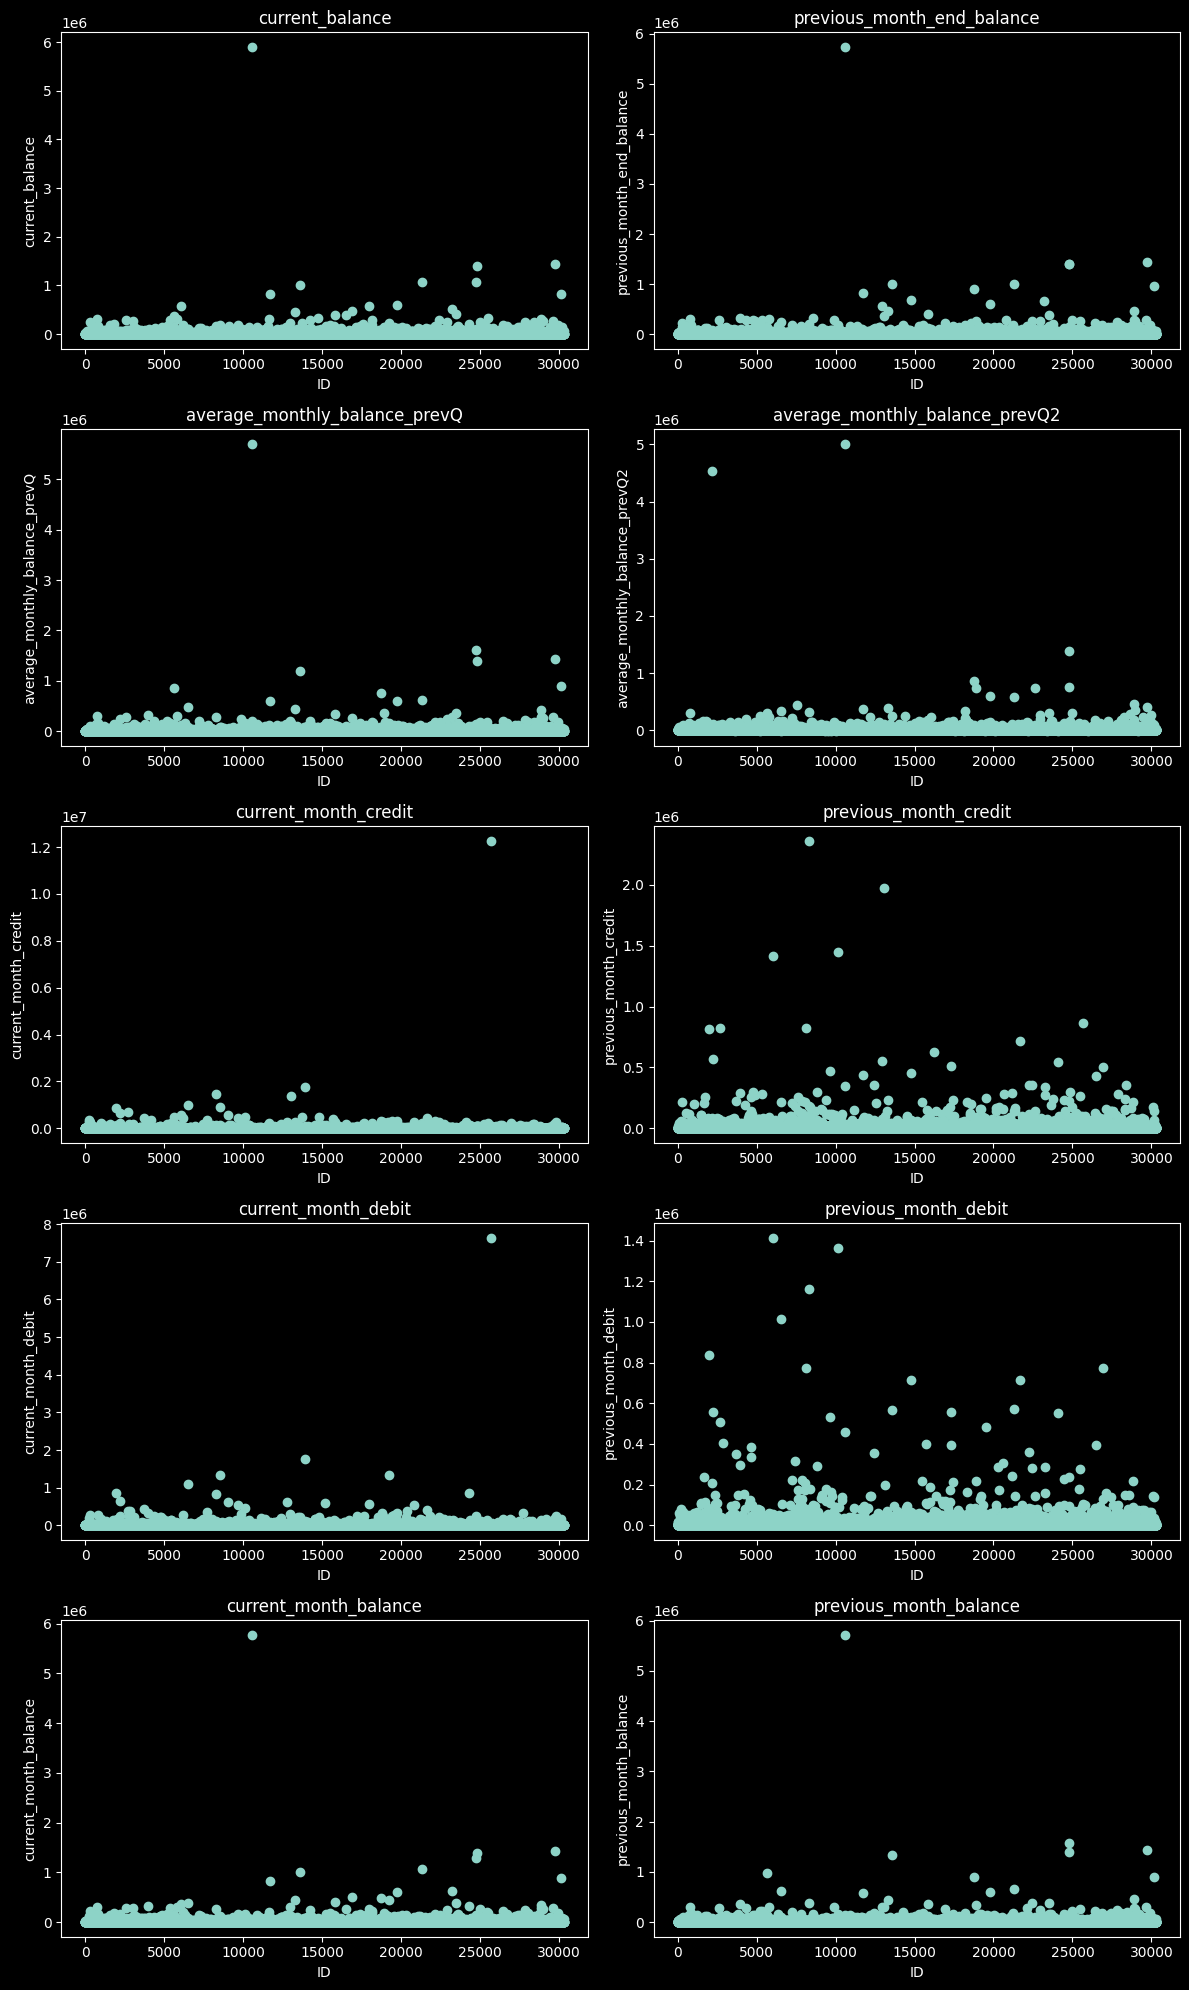

In [213]:
import matplotlib.pyplot as plt
num_outliers = len(outliers)
fig, axes = plt.subplots(num_outliers // 2, 2, figsize=(12, 4 * (num_outliers // 2)))
axes = axes.flatten()
for i in range(0, num_outliers, 2):
    ax1 = axes[i]
    ax2 = axes[i + 1] if i + 1 < num_outliers else None
    out1 = outliers[i]
    out2 = outliers[i + 1] if i + 1 < num_outliers else None
    ax1.scatter(data['customer_id'], data[out1])
    ax1.set_xlabel('ID')
    ax1.set_ylabel(out1)
    ax1.set_title(out1)
    if ax2:
        ax2.scatter(data['customer_id'], data[out2])
        ax2.set_xlabel('ID')
        ax2.set_ylabel(out2)
        ax2.set_title(out2)
plt.tight_layout()
plt.show()

In [214]:
from scipy.stats.mstats import winsorize
alpha = 0.05
for out in outliers:
    data[out] = winsorize(data[out], limits=[alpha, alpha])

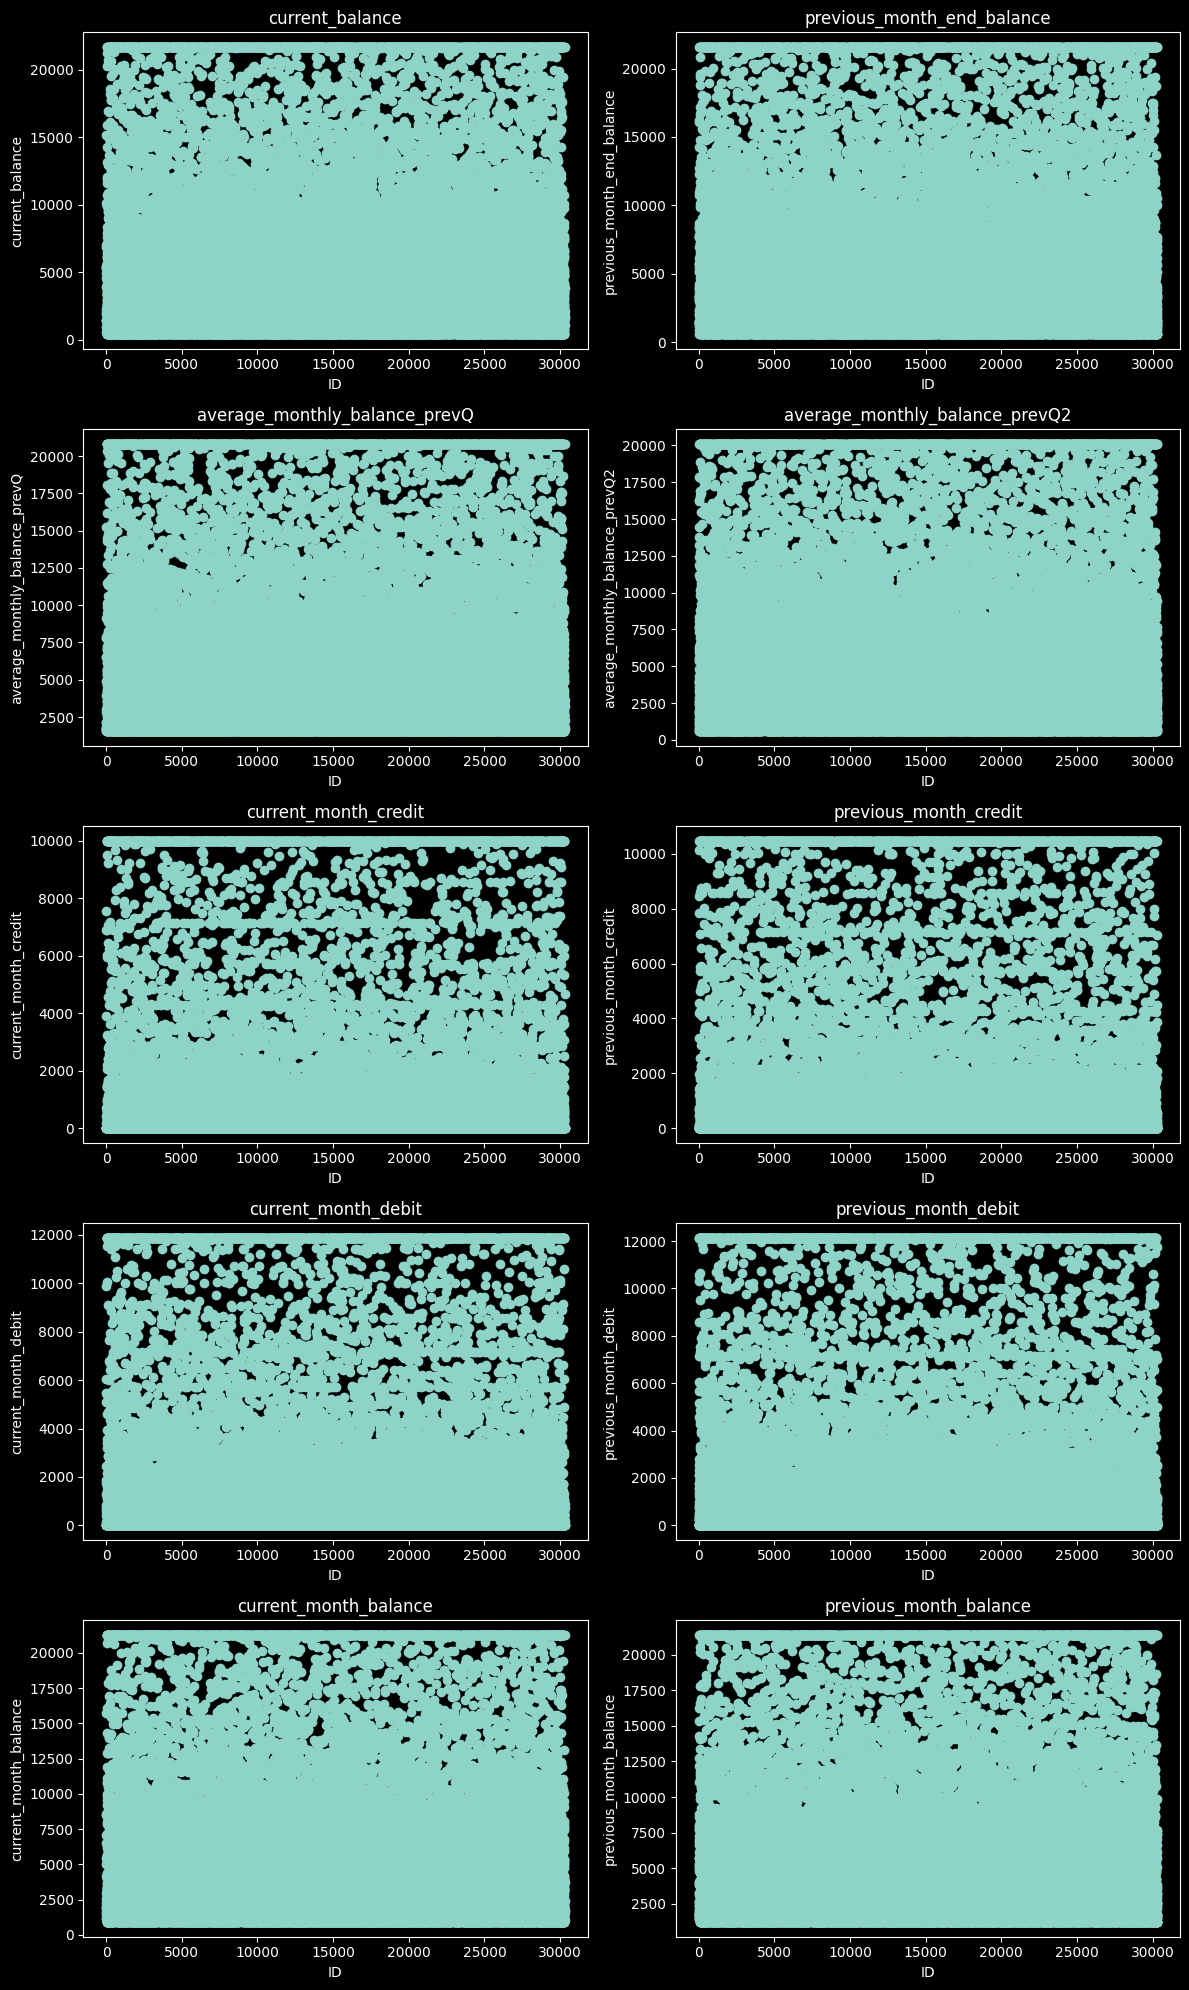

In [215]:
import matplotlib.pyplot as plt
num_outliers = len(outliers)
fig, axes = plt.subplots(num_outliers // 2, 2, figsize=(12, 4 * (num_outliers // 2)))
axes = axes.flatten()
for i in range(0, num_outliers, 2):
    ax1 = axes[i]
    ax2 = axes[i + 1] if i + 1 < num_outliers else None
    out1 = outliers[i]
    out2 = outliers[i + 1] if i + 1 < num_outliers else None
    ax1.scatter(data['customer_id'], data[out1])
    ax1.set_xlabel('ID')
    ax1.set_ylabel(out1)
    ax1.set_title(out1)
    if ax2:
        ax2.scatter(data['customer_id'], data[out2])
        ax2.set_xlabel('ID')
        ax2.set_ylabel(out2)
        ax2.set_title(out2)
plt.tight_layout()
plt.show()


# SCALING

In [216]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Y=data['churn']
X=data.drop(columns=['churn','customer_id'])
scaled=scaler.fit_transform(X)
X=pd.DataFrame(data=scaled,columns=X.columns)
X.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,0.478644,0.999147,0.813874,-3.642186e-01,-0.659607,-1.436917,-0.341489,-0.182318,1.894492e+00,-0.711769,-0.738331,-0.794729,-0.746110,-0.444709,-0.454403,-0.499222,-0.500372,-0.763180,-0.776638
1,-1.275909,-0.741756,0.813874,-3.642186e-01,-0.659607,0.507942,-0.341489,2.439824,-1.229903e-01,0.004245,0.603570,0.436754,1.416114,-0.444567,-0.454270,1.289225,-0.468402,0.190903,0.617469
2,-0.005178,-0.966389,0.813874,-3.642186e-01,0.438268,-1.532642,-0.341489,-0.943689,1.748180e-16,-0.264777,0.068478,-0.131556,-0.476704,-0.444548,-0.454251,1.471934,-0.417858,-0.091360,-0.089670
3,-1.171568,2.346943,0.813874,5.822616e-17,-0.659607,0.507942,-0.341489,-0.366796,9.472594e-01,-0.560030,-0.584028,-0.687383,-0.833332,-0.444603,-0.454303,-0.499134,0.182315,-0.605393,-0.736486
4,0.103512,-0.348649,0.813874,1.733600e+00,-0.659607,1.614620,1.172672,-0.573667,-1.475938e-01,-0.808470,-0.748886,-0.774177,-0.662925,-0.444658,-0.188893,-0.307398,-0.010491,-0.820288,-0.735084


# MULTICOLLINEARITY

In [217]:
X.corr()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
vintage,1.000000,0.227390,0.039276,0.034681,0.013736,0.041720,-0.167366,-0.380714,-0.084282,0.055266,0.051655,0.061472,0.071798,0.046795,0.054239,0.035868,0.051871,0.054836,0.055389
age,0.227390,1.000000,0.089528,-0.000570,0.005955,0.014564,-0.076532,-0.058990,-0.015311,0.101519,0.101442,0.117703,0.115381,0.036820,0.045169,0.033117,0.035361,0.107375,0.111602
gender,0.039276,0.089528,1.000000,0.174103,0.138544,0.004317,0.042773,0.068892,-0.073783,0.039943,0.044369,0.043012,0.045350,0.071876,0.076710,0.080580,0.072446,0.041036,0.041246
dependents,0.034681,-0.000570,0.174103,1.000000,-0.080427,0.001394,0.012593,0.018303,-0.073696,0.008943,0.010790,0.013487,0.009832,0.081116,0.068350,0.085864,0.075881,0.012018,0.011427
occupation,0.013736,0.005955,0.138544,-0.080427,1.000000,-0.002905,0.008039,-0.043317,0.009504,-0.029238,-0.027697,-0.037689,-0.034544,-0.058603,-0.040636,-0.067622,-0.055171,-0.034235,-0.034203
city,0.041720,0.014564,0.004317,0.001394,-0.002905,1.000000,0.009323,-0.055779,-0.002951,-0.009416,-0.011824,-0.007674,-0.003016,-0.001655,0.000345,-0.008791,-0.003762,-0.009684,-0.007301
customer_nw_category,-0.167366,-0.076532,0.042773,0.012593,0.008039,0.009323,1.000000,0.235059,0.047040,-0.178951,-0.178079,-0.212221,-0.214503,-0.115311,-0.120648,-0.107188,-0.113922,-0.190574,-0.195112
branch_code,-0.380714,-0.058990,0.068892,0.018303,-0.043317,-0.055779,0.235059,1.000000,0.036956,-0.011618,-0.007999,-0.013720,-0.011722,-0.016465,-0.033903,-0.012017,-0.024600,-0.013032,-0.009806
days_since_last_transaction,-0.084282,-0.015311,-0.073783,-0.073696,0.009504,-0.002951,0.047040,0.036956,1.000000,-0.059454,-0.031735,-0.037622,0.013287,-0.328573,-0.281220,-0.227873,-0.204817,-0.057131,-0.027135
current_balance,0.055266,0.101519,0.039943,0.008943,-0.029238,-0.009416,-0.178951,-0.011618,-0.059454,1.000000,0.803147,0.840755,0.647735,0.224587,0.142874,0.065291,0.060064,0.921802,0.780976


In [218]:
# pair of independent variables corr >0.5
k=X.corr()
# List Compression
z=[[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]
z,len(z)

([['current_balance', 'previous_month_end_balance'],
  ['current_balance', 'average_monthly_balance_prevQ'],
  ['current_balance', 'average_monthly_balance_prevQ2'],
  ['current_balance', 'current_month_balance'],
  ['current_balance', 'previous_month_balance'],
  ['previous_month_end_balance', 'current_balance'],
  ['previous_month_end_balance', 'average_monthly_balance_prevQ'],
  ['previous_month_end_balance', 'average_monthly_balance_prevQ2'],
  ['previous_month_end_balance', 'current_month_balance'],
  ['previous_month_end_balance', 'previous_month_balance'],
  ['average_monthly_balance_prevQ', 'current_balance'],
  ['average_monthly_balance_prevQ', 'previous_month_end_balance'],
  ['average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2'],
  ['average_monthly_balance_prevQ', 'current_month_balance'],
  ['average_monthly_balance_prevQ', 'previous_month_balance'],
  ['average_monthly_balance_prevQ2', 'current_balance'],
  ['average_monthly_balance_prevQ2', 'previous_month_e

In [219]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=X
# calc vif for every column by list compression
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
print((VIF>5).sum())
VIF

5


vintage                            1.250568
age                                1.076985
gender                             1.090022
dependents                         1.053390
occupation                         1.043248
city                               1.004780
customer_nw_category               1.142729
branch_code                        1.232178
days_since_last_transaction        1.175478
current_balance                    8.222271
previous_month_end_balance        11.501159
average_monthly_balance_prevQ     25.579507
average_monthly_balance_prevQ2     2.928528
current_month_credit               2.164625
previous_month_credit              1.877427
current_month_debit                2.165556
previous_month_debit               1.996782
current_month_balance             17.345637
previous_month_balance            17.635491
dtype: float64

In [220]:
def MC_remover(data):
    vif=pd.Series([variance_inflation_factor(data.values,i) for i in range(data.shape[1])],index=data.columns)
    if vif.max() > 5:
        print(vif[vif == vif.max()].index[0],'has been removed.')
        data=data.drop(columns=[vif[vif == vif.max()].index[0]])
        return data
    else:
        print('No Multicollinearity is left.')
        return data

In [221]:
for i in range(9):
    vif_data=MC_remover(vif_data)
vif_data.head()

average_monthly_balance_prevQ has been removed.
current_month_balance has been removed.
previous_month_end_balance has been removed.
No Multicollinearity is left.
No Multicollinearity is left.
No Multicollinearity is left.
No Multicollinearity is left.
No Multicollinearity is left.
No Multicollinearity is left.


,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,previous_month_balance
0,0.478644,0.999147,0.813874,-3.642186e-01,-0.659607,-1.436917,-0.341489,-0.182318,1.894492e+00,-0.711769,-0.746110,-0.444709,-0.454403,-0.499222,-0.500372,-0.776638
1,-1.275909,-0.741756,0.813874,-3.642186e-01,-0.659607,0.507942,-0.341489,2.439824,-1.229903e-01,0.004245,1.416114,-0.444567,-0.454270,1.289225,-0.468402,0.617469
2,-0.005178,-0.966389,0.813874,-3.642186e-01,0.438268,-1.532642,-0.341489,-0.943689,1.748180e-16,-0.264777,-0.476704,-0.444548,-0.454251,1.471934,-0.417858,-0.089670
3,-1.171568,2.346943,0.813874,5.822616e-17,-0.659607,0.507942,-0.341489,-0.366796,9.472594e-01,-0.560030,-0.833332,-0.444603,-0.454303,-0.499134,0.182315,-0.736486
4,0.103512,-0.348649,0.813874,1.733600e+00,-0.659607,1.614620,1.172672,-0.573667,-1.475938e-01,-0.808470,-0.662925,-0.444658,-0.188893,-0.307398,-0.010491,-0.735084


# TRAIN & SPLIT DATASETS 

In [222]:
x=vif_data
y=Y

In [223]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,stratify=y,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((22705, 16), (5677, 16), (22705,), (5677,))

# BALANCING DATA

In [224]:
y_train.value_counts()

churn
0    18497
1     4208
Name: count, dtype: int64

In [225]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_train,y_train=smote.fit_resample(x_train,y_train)

In [226]:
y_train.value_counts()

churn
0    18497
1    18497
Name: count, dtype: int64

# HELPER FUNCTIONS

In [227]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [228]:
from sklearn.metrics import confusion_matrix,f1_score
import seaborn as sns
class_labels = ["Will Not Churn", "Will Churn"]
def plot_confusionmatrix(y_train,y_train_pred):
    print('Confusion matrix')
    cf = confusion_matrix(y_train,y_train_pred)
    sns.heatmap(cf,annot=True,cmap='Blues',xticklabels=class_labels,yticklabels=class_labels,fmt='g')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.tight_layout()
    print('F1 Score:',f1_score(y_train,y_train_pred))
    plt.show()

In [229]:
from sklearn.metrics import roc_curve,roc_auc_score
def plot_auc_roc_curve(y_test,predicted_probabilities):
    fpr,tpr,threshold=roc_curve(y_test,predicted_probabilities[:,1])
    plt.figure(figsize=(7,5),dpi=100)
    plt.plot(fpr,tpr,color='green')
    plt.plot([0,1],[0,1],color='red',label='Baseline')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.title('AUC-ROC Curve')
    print('AUC-ROC Score:',roc_auc_score(y_test,predicted_probabilities[:,1]))
    plt.show()

# LOGISTIC REGRESSION

In [230]:
y.value_counts()/len(y)

churn
0    0.814671
1    0.185329
Name: count, dtype: float64

In [231]:
from sklearn.linear_model import LogisticRegression as lr
classifier=lr(class_weight='balanced',random_state=42)
classifier.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [232]:
predicted_values=classifier.predict(x_test)
predicted_probabilities=classifier.predict_proba(x_test)

In [233]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      4625
           1       0.47      0.67      0.56      1052

    accuracy                           0.80      5677
   macro avg       0.70      0.75      0.71      5677
weighted avg       0.84      0.80      0.81      5677



Confusion matrix
F1 Score: 0.5560361777428234


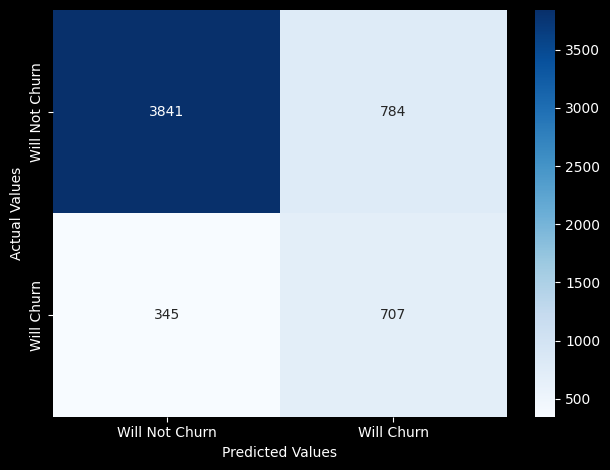

In [234]:
plot_confusionmatrix(y_test,predicted_values)

AUC-ROC Score: 0.7890901243448771


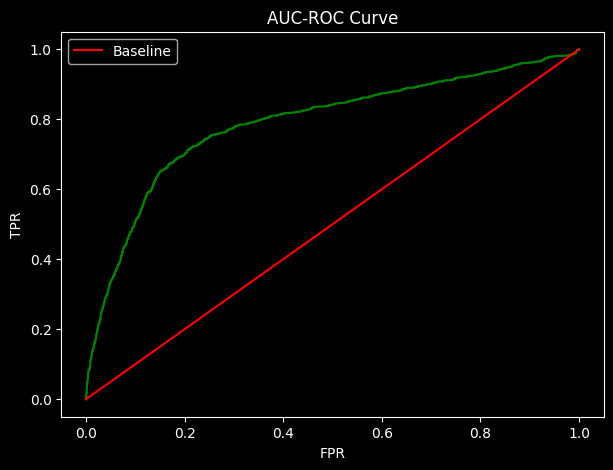

In [235]:
plot_auc_roc_curve(y_test,predicted_probabilities)

## ADJUSTING HYPER PARAMETERS

In [236]:
param_grid = {'penalty': ['l1', 'l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100],'solver': ['liblinear', 'lbfgs', 'saga']}
rsc0=RandomizedSearchCV(classifier,param_grid,random_state=42)
rsc0.fit(x_train,y_train)

RandomizedSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                                random_state=42),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'lbfgs',
                                                   'saga']},
                   random_state=42)

In [237]:
print(rsc0.best_params_)

{'solver': 'saga', 'penalty': 'l2', 'C': 100}


In [238]:
classifier1=rsc0.best_estimator_

### Training Data

In [239]:
predicted_values=classifier1.predict(x_train)
predicted_probabilities=classifier1.predict_proba(x_train)

In [240]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76     18497
           1       0.79      0.66      0.72     18497

    accuracy                           0.74     36994
   macro avg       0.75      0.74      0.74     36994
weighted avg       0.75      0.74      0.74     36994



Confusion matrix
F1 Score: 0.7191328104344761


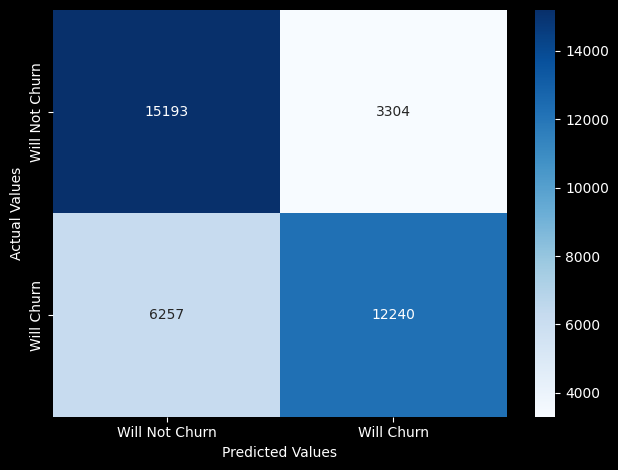

In [241]:
plot_confusionmatrix(y_train,predicted_values)

AUC-ROC Score: 0.7852800058820537


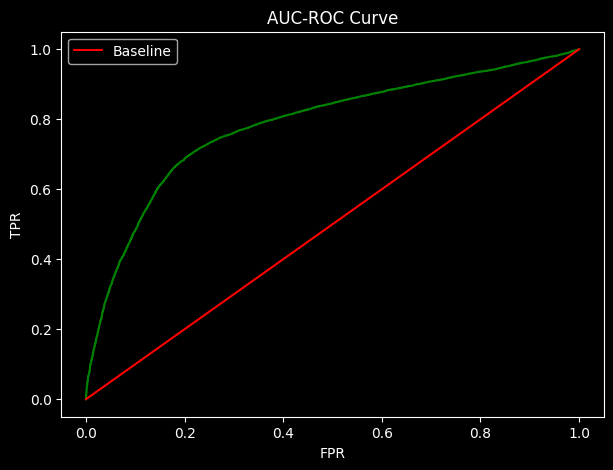

In [242]:
plot_auc_roc_curve(y_train,predicted_probabilities)

### Testing Data

In [243]:
predicted_values=classifier1.predict(x_test)
predicted_probabilities=classifier1.predict_proba(x_test)

In [244]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      4625
           1       0.47      0.67      0.56      1052

    accuracy                           0.80      5677
   macro avg       0.70      0.75      0.71      5677
weighted avg       0.84      0.80      0.81      5677



Confusion matrix
F1 Score: 0.5560361777428234


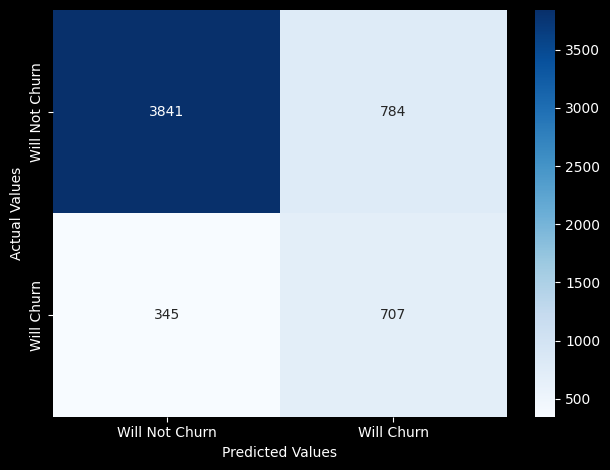

In [245]:
plot_confusionmatrix(y_test,predicted_values)

AUC-ROC Score: 0.7890932072757169


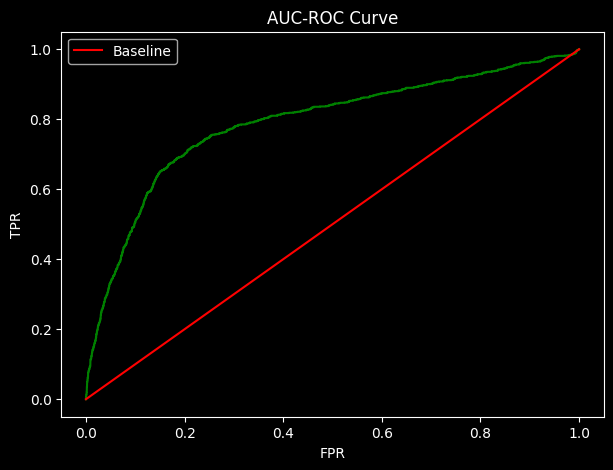

In [246]:
plot_auc_roc_curve(y_test,predicted_probabilities)

# DECISION TREE

In [247]:
from sklearn.tree import DecisionTreeClassifier as dtc
Dclassifier=dtc(class_weight='balanced',random_state=42)
Dclassifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [248]:
predicted_values1=Dclassifier.predict(x_test)
predicted_probabilities1=Dclassifier.predict_proba(x_test)

In [249]:
print(classification_report(y_test,predicted_values1))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      4625
           1       0.36      0.54      0.43      1052

    accuracy                           0.74      5677
   macro avg       0.62      0.66      0.63      5677
weighted avg       0.79      0.74      0.76      5677



Confusion matrix
F1 Score: 0.4341555977229601


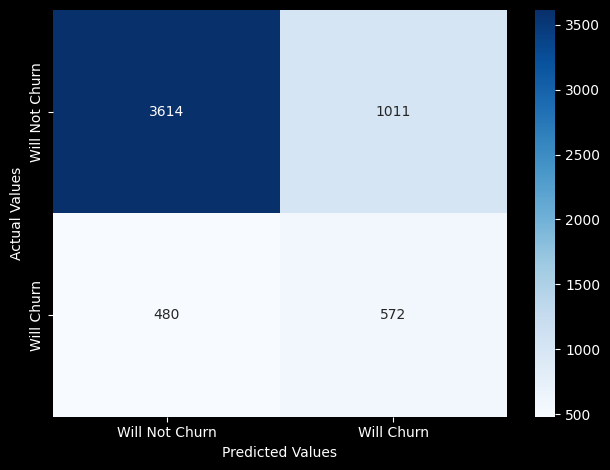

In [250]:
plot_confusionmatrix(y_test,predicted_values1)

AUC-ROC Score: 0.6625658205734252


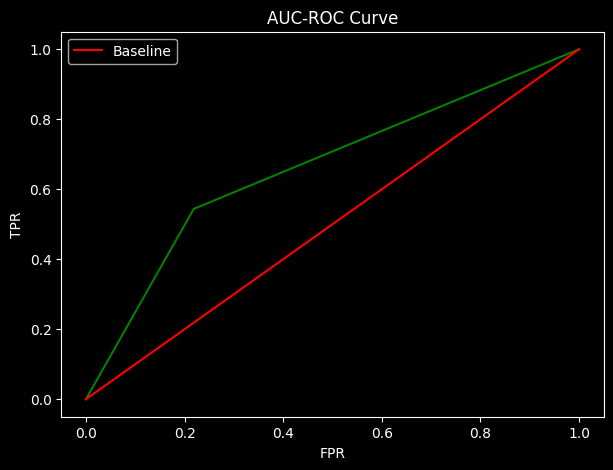

In [251]:
plot_auc_roc_curve(y_test,predicted_probabilities1)

## PRUNING

### Post-Pruning Technique

In [252]:
ccp_alphas=Dclassifier.cost_complexity_pruning_path(x_train,y_train)['ccp_alphas']
ccp_alphas.tolist()

[0.0,
 1.7601848697023164e-05,
 1.7611373506924135e-05,
 1.7620474991940648e-05,
 1.7715500666011202e-05,
 1.776349832791418e-05,
 1.778990263609395e-05,
 1.780640532870623e-05,
 1.7902381514688516e-05,
 1.7919127110448116e-05,
 1.7920264688350052e-05,
 1.792658985972074e-05,
 1.7983396706973312e-05,
 2.1144500785488777e-05,
 2.1448596738798304e-05,
 2.1477011081397113e-05,
 2.25261754158332e-05,
 2.25261754158332e-05,
 2.316978042771415e-05,
 2.316978042771415e-05,
 2.365248418662486e-05,
 2.365248418662486e-05,
 2.365248418662486e-05,
 2.365248418662486e-05,
 2.402792044355541e-05,
 2.402792044355541e-05,
 2.402792044355541e-05,
 2.432826944909986e-05,
 2.432826944909986e-05,
 2.432826944909986e-05,
 2.432826944909986e-05,
 2.432826944909986e-05,
 2.432826944909986e-05,
 2.432826944909986e-05,
 2.432826944909986e-05,
 2.457400954454531e-05,
 2.457400954454531e-05,
 2.457400954454531e-05,
 2.477879295741652e-05,
 2.477879295741652e-05,
 2.477879295741652e-05,
 2.477879295741652e-05,
 

In [253]:
parameters={'ccp_alpha':ccp_alphas.tolist()}
rsc=RandomizedSearchCV(Dclassifier,parameters,random_state=42)
rsc.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=42),
                   param_distributions={'ccp_alpha': [0.0,
                                                      1.7601848697023164e-05,
                                                      1.7611373506924135e-05,
                                                      1.7620474991940648e-05,
                                                      1.7715500666011202e-05,
                                                      1.776349832791418e-05,
                                                      1.778990263609395e-05,
                                                      1.780640532870623e-05,
                                                      1.7902381514688516e-05,
                                                      1.7919127110448116e-05,
                                                      1.7920264688350...
                                                      2.1477011081397113e-05,
                                                      2.25261754158332e-05,
                                                      2.25261754158332e-05,
                                                      2.316978042771415e-05,
                                                      2.316978042771415e-05,
                                                      2.365248418662486e-05,
                                                      2.365248418662486e-05,
                                                      2.365248418662486e-05,
                                                      2.365248418662486e-05,
                                                      2.402792044355541e-05,
                                                      2.402792044355541e-05,
                                                      2.402792044355541e-05,
                                                      2.432826944909986e-05,
                                                      2.432826944909986e-05,
                                                      2.432826944909986e-05, ...]},
                   random_state=42)

In [254]:
print(rsc.best_params_)

{'ccp_alpha': 8.259113218592263e-05}


### Training Data

In [255]:
Final_model=rsc.best_estimator_
predicted_values1=Final_model.predict(x_train)
predicted_probabilities1=Final_model.predict_proba(x_train)

In [256]:
print(classification_report(y_train,predicted_values1))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     18497
           1       0.92      0.91      0.92     18497

    accuracy                           0.92     36994
   macro avg       0.92      0.92      0.92     36994
weighted avg       0.92      0.92      0.92     36994



Confusion matrix
F1 Score: 0.9152184505440962


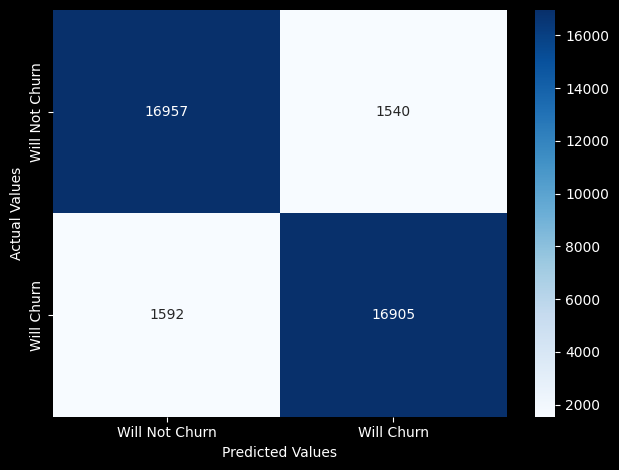

In [257]:
plot_confusionmatrix(y_train,predicted_values1)

AUC-ROC Score: 0.9552475803774834


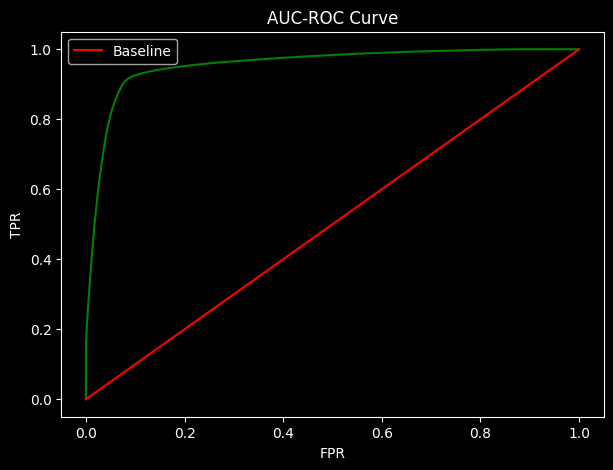

In [258]:
plot_auc_roc_curve(y_train,predicted_probabilities1)

### Testing Data

In [259]:
Final_model=rsc.best_estimator_
predicted_values1=Final_model.predict(x_test)
predicted_probabilities1=Final_model.predict_proba(x_test)

In [260]:
print(classification_report(y_test,predicted_values1))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      4625
           1       0.41      0.59      0.48      1052

    accuracy                           0.77      5677
   macro avg       0.65      0.70      0.67      5677
weighted avg       0.81      0.77      0.78      5677



Confusion matrix
F1 Score: 0.4829192546583851


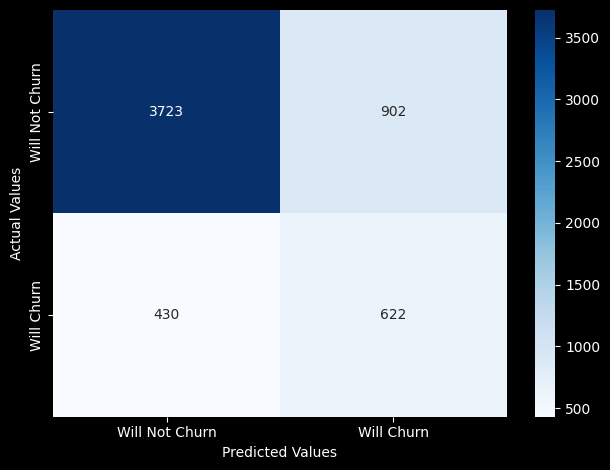

In [261]:
plot_confusionmatrix(y_test,predicted_values1)

AUC-ROC Score: 0.7211596958174905


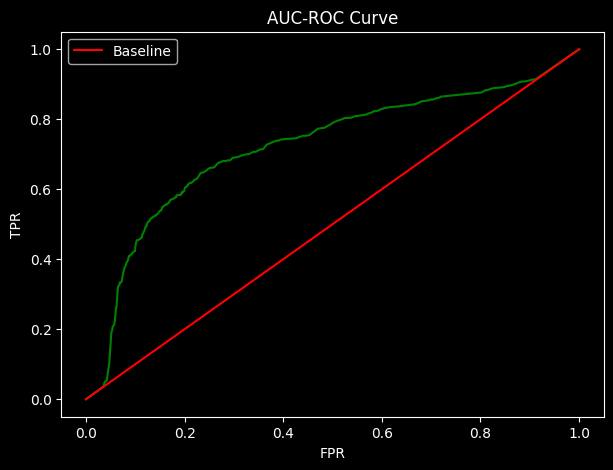

In [262]:
plot_auc_roc_curve(y_test,predicted_probabilities1)

# RANDOM FOREST CLASSIFIER

In [263]:
from sklearn.ensemble import RandomForestClassifier
Rclassifier=RandomForestClassifier(class_weight='balanced_subsample',n_jobs=-1,random_state=42)
Rclassifier.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced_subsample', n_jobs=-1,
                       random_state=42)

In [264]:
predicted_values2=Rclassifier.predict(x_test)
predicted_probabilities2=Rclassifier.predict_proba(x_test)

In [265]:
print(classification_report(y_test,predicted_values2))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4625
           1       0.55      0.58      0.57      1052

    accuracy                           0.84      5677
   macro avg       0.73      0.74      0.73      5677
weighted avg       0.84      0.84      0.84      5677



Confusion matrix
F1 Score: 0.5673166202414113


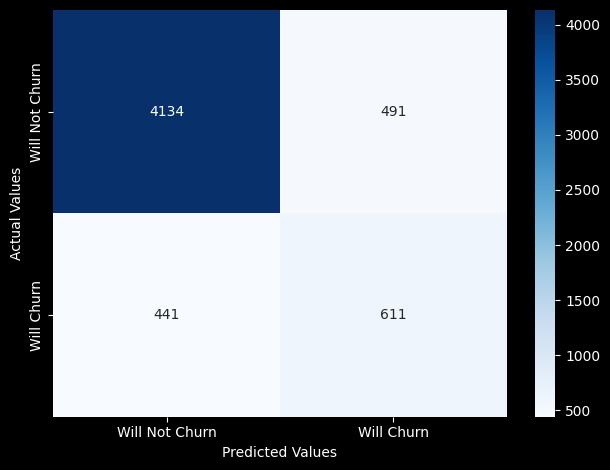

In [266]:
plot_confusionmatrix(y_test,predicted_values2)

AUC-ROC Score: 0.8179771863117871


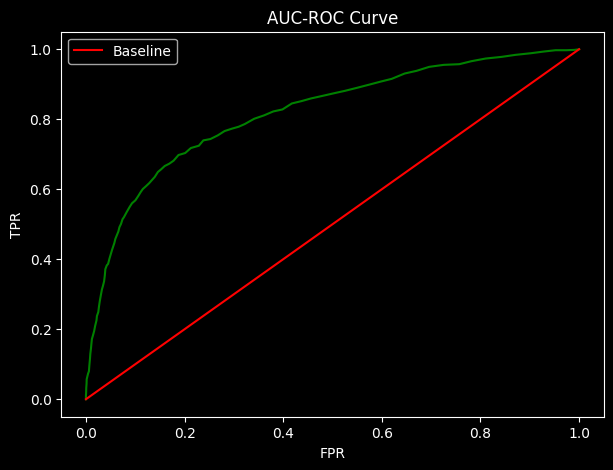

In [267]:
plot_auc_roc_curve(y_test,predicted_probabilities2)

## HYPER PARAMETER TUNING

In [268]:
ccp_search=RandomizedSearchCV(Rclassifier,parameters,random_state=42)
ccp_search.fit(x_train,y_train)
ccp=ccp_search.best_params_
print(ccp)

{'ccp_alpha': 3.2073673604288636e-05}


In [269]:
ccp_list=list(ccp.values())
param={'n_estimators':np.arange(40,160,20),'ccp_alpha':ccp_list}
rsc1=RandomizedSearchCV(Rclassifier,param,random_state=42)
rsc1=rsc1.fit(x_train,y_train)

In [270]:
print(rsc1.best_params_)

{'n_estimators': 140, 'ccp_alpha': 3.2073673604288636e-05}


### Training Data

In [271]:
forest_model=rsc1.best_estimator_
predicted_values2=forest_model.predict(x_train)
predicted_probabilities2=forest_model.predict_proba(x_train)

In [272]:
print(classification_report(y_train,predicted_values2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18497
           1       1.00      1.00      1.00     18497

    accuracy                           1.00     36994
   macro avg       1.00      1.00      1.00     36994
weighted avg       1.00      1.00      1.00     36994



Confusion matrix
F1 Score: 0.9959698141786805


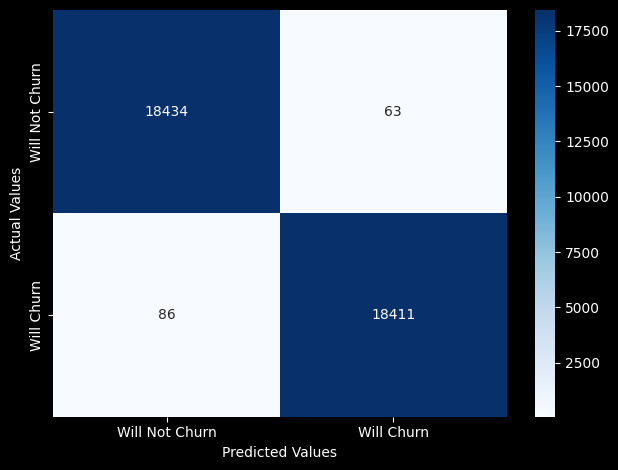

In [273]:
plot_confusionmatrix(y_train,predicted_values2)

AUC-ROC Score: 0.9999280877089348


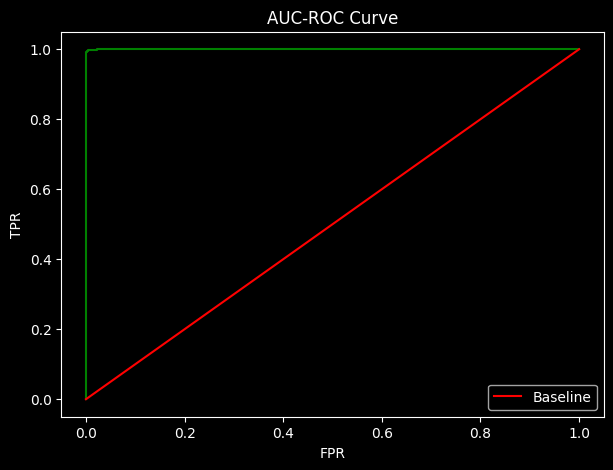

In [274]:
plot_auc_roc_curve(y_train,predicted_probabilities2)

### Testing Data

In [275]:
forest_model=rsc1.best_estimator_
predicted_values2=forest_model.predict(x_test)
predicted_probabilities2=forest_model.predict_proba(x_test)

In [276]:
print(classification_report(y_test,predicted_values2))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4625
           1       0.56      0.59      0.57      1052

    accuracy                           0.84      5677
   macro avg       0.73      0.74      0.74      5677
weighted avg       0.84      0.84      0.84      5677



Confusion matrix
F1 Score: 0.5722196585140747


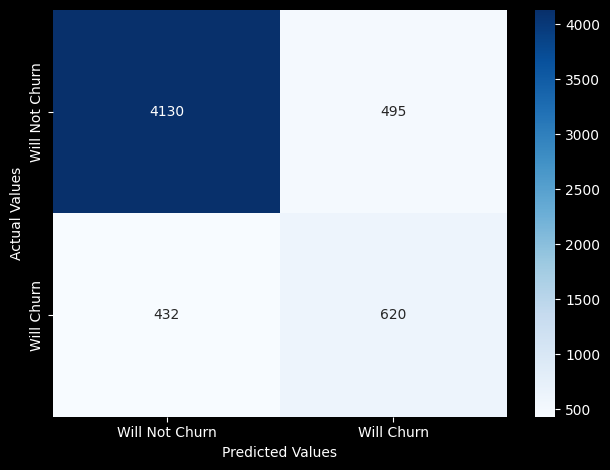

In [277]:
plot_confusionmatrix(y_test,predicted_values2)

AUC-ROC Score: 0.8189409104922413


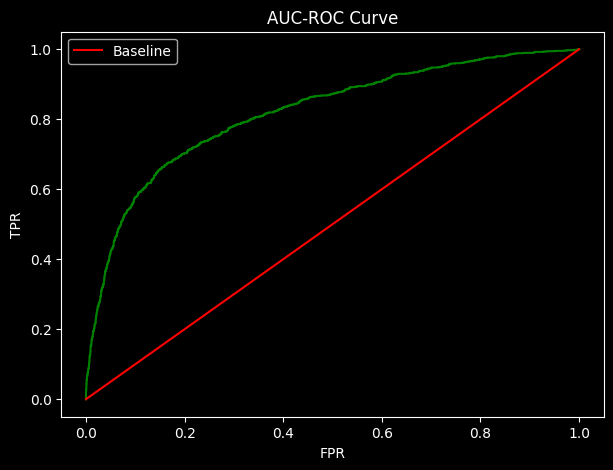

In [278]:
plot_auc_roc_curve(y_test,predicted_probabilities2)

# PLOTING BEST MODEL

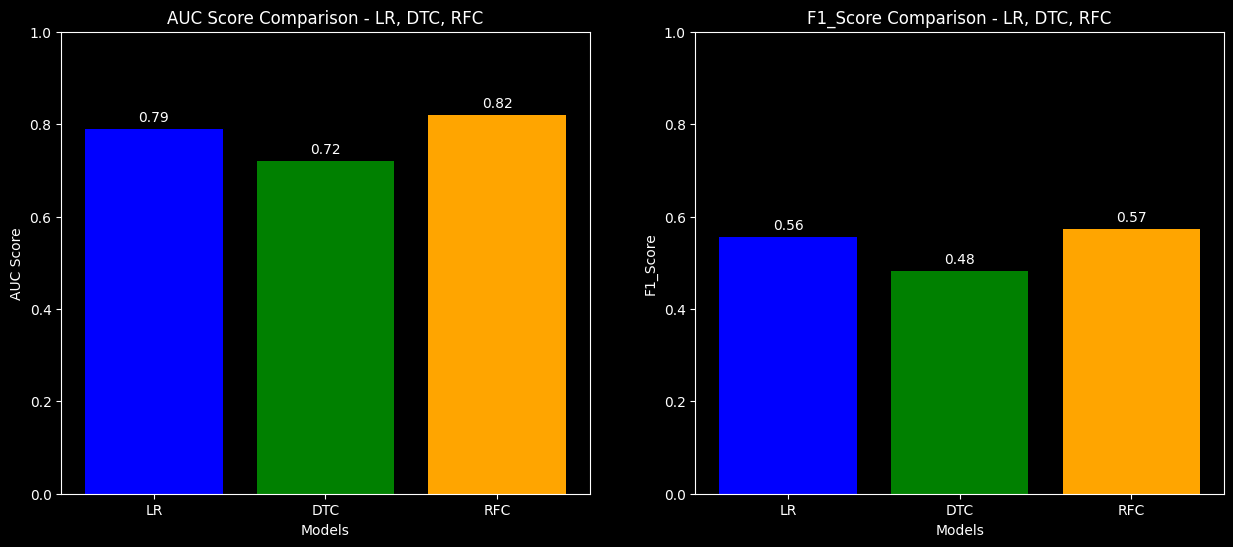

In [279]:
auc_scores = {'LR':roc_auc_score(y_test,predicted_probabilities[:,1]), 'DTC':roc_auc_score(y_test,predicted_probabilities1[:,1]), 'RFC': roc_auc_score(y_test,predicted_probabilities2[:,1])}


models = list(auc_scores.keys())
scores = list(auc_scores.values())

plt.figure(figsize=(15,6),dpi=100)
plt.subplot(1,2,1)

plt.bar(models, scores, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('AUC Score')
plt.title('AUC Score Comparison - LR, DTC, RFC')
plt.ylim(0, 1)

for i, score in enumerate(scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom')

f1_scores = {'LR':f1_score(y_test,predicted_values), 'DTC':f1_score(y_test,predicted_values1), 'RFC': f1_score(y_test,predicted_values2)}

models = list(f1_scores.keys())
scores = list(f1_scores.values())

plt.subplot(1,2,2)

plt.bar(models, scores, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('F1_Score')
plt.title('F1_Score Comparison - LR, DTC, RFC')
plt.ylim(0, 1)

for i, score in enumerate(scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom')
plt.show()

# FEATURE IMPORTANCE PLOT

In [280]:
feature_importances = forest_model.feature_importances_
features=x_train.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

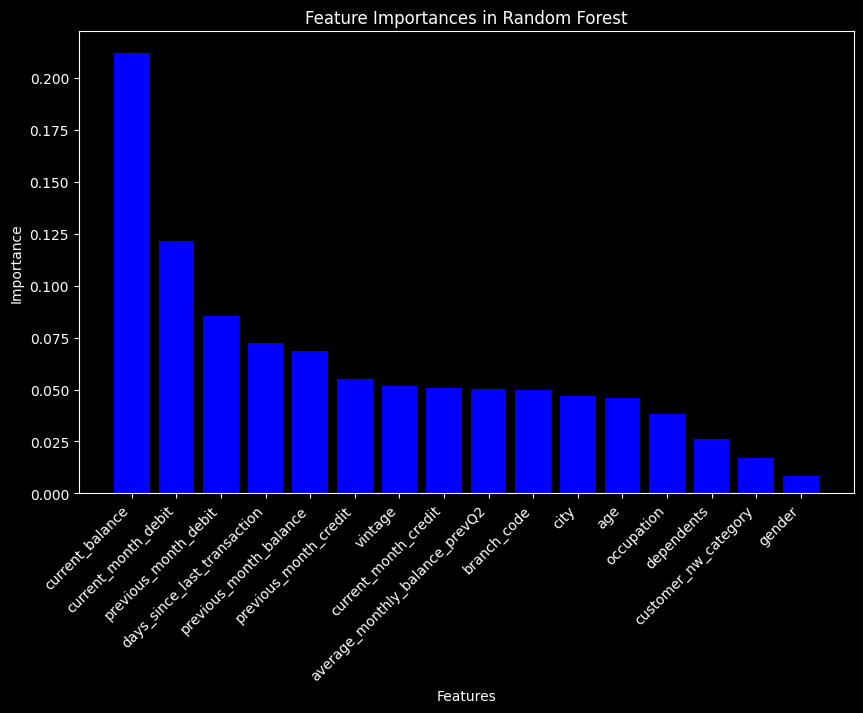

In [281]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest')
plt.xticks(rotation=45, ha='right')
plt.show()